Phishing URL Detection

Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [3]:
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


Familiarizing with data

In [4]:
#Shape of dataframe

data.shape

(11054, 32)

In [5]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [6]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [7]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [8]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [9]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


# Data Visualization

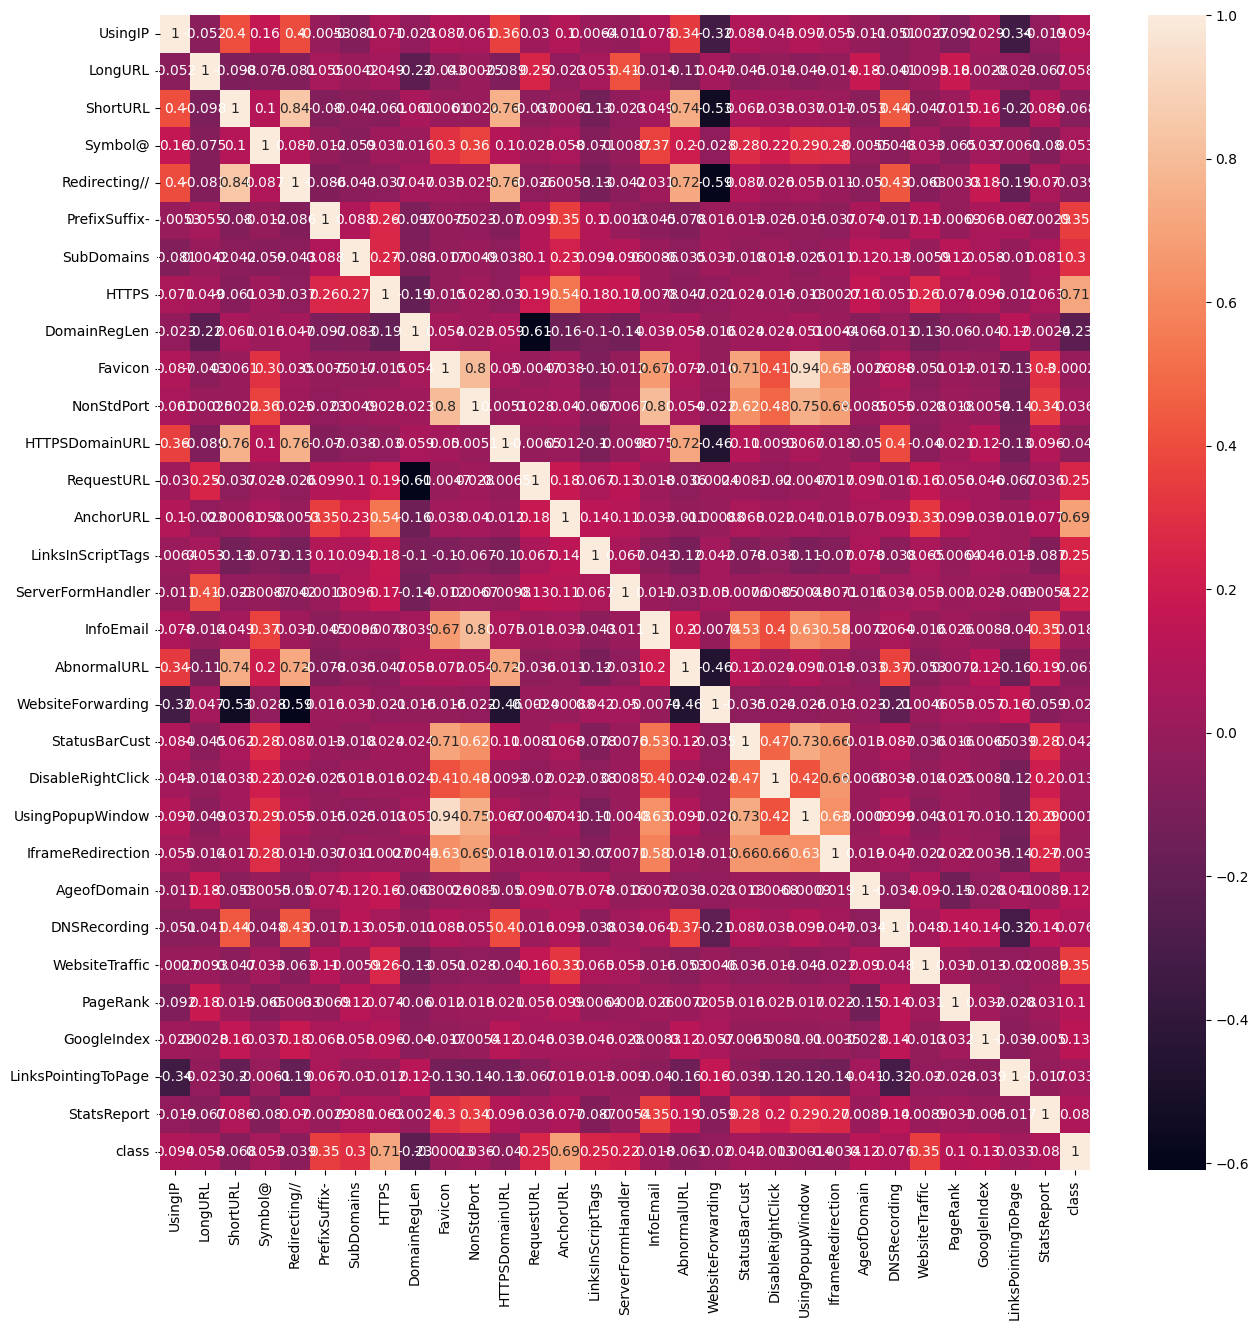

In [10]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

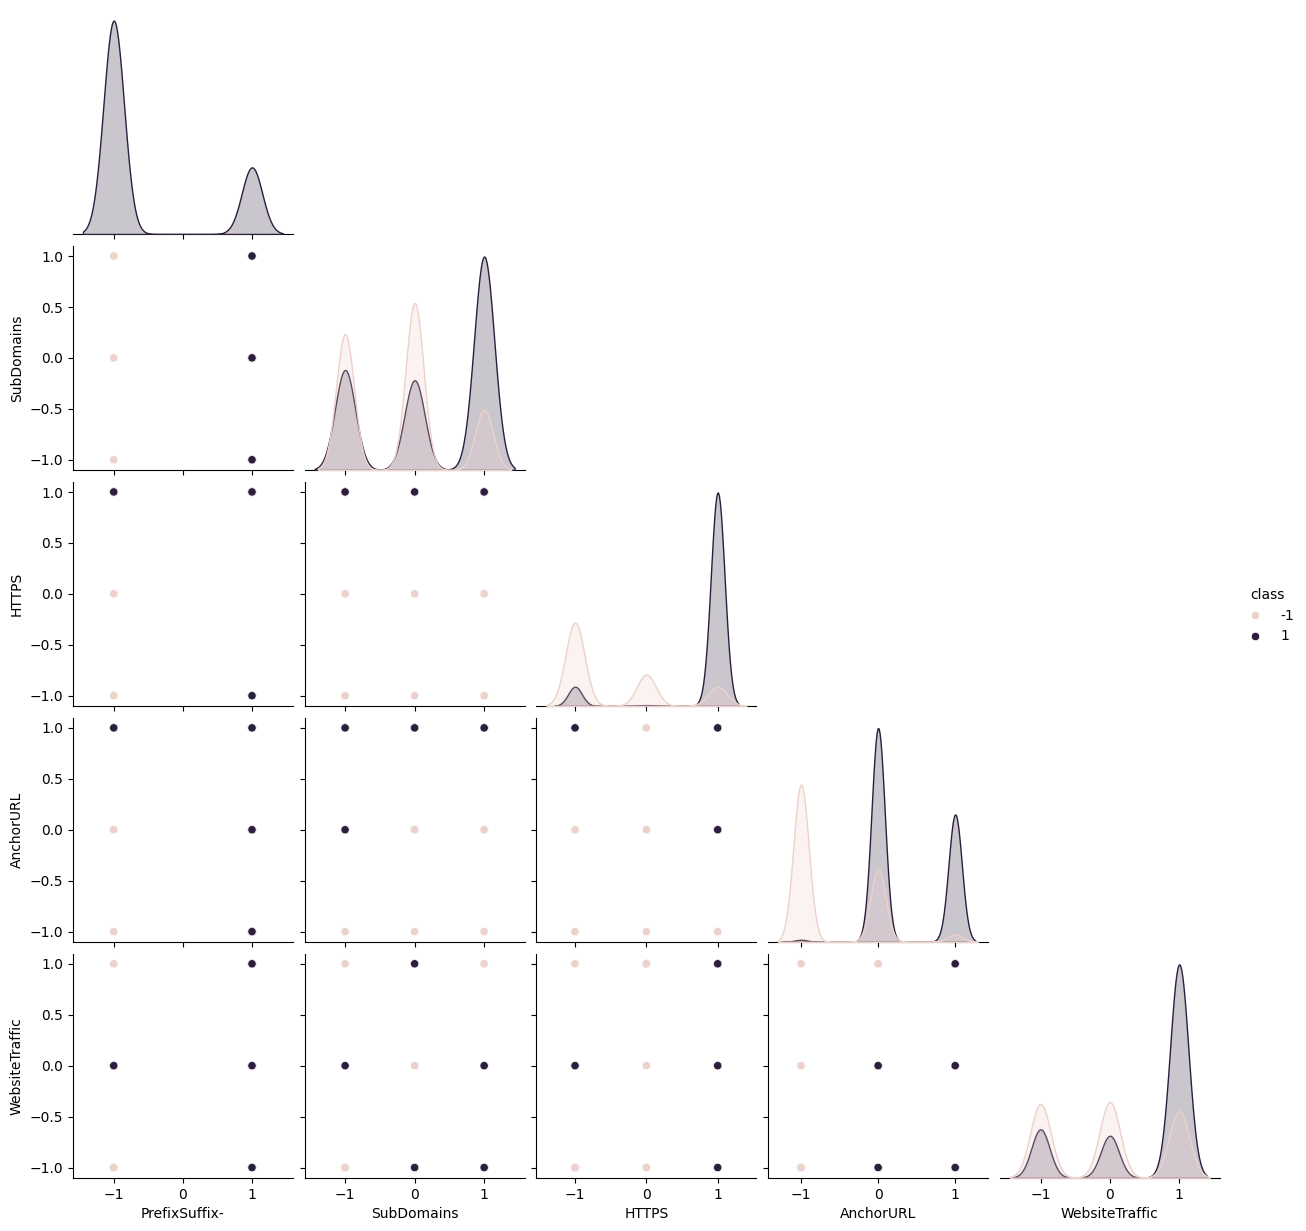

In [11]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


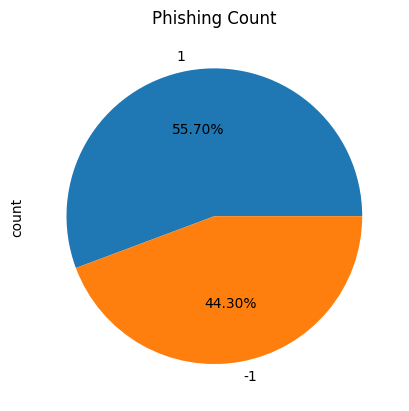

In [12]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

# Splitting the data 
The data is split into train & test sets, 80-20 split.

In [14]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [15]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

# Model Building and Training

The supervised machine learning models considered to train the dataset in this notebook are:

1. Support Vector Clasifier
2. Naive Bayes
3. Random Forest
4. Xgboost

The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [47]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

# Simple Vector Machine Classifier

In [49]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [50]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [51]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [52]:
#computing the classification report of the model
print("SVM Classification Report:")
print(metrics.classification_report(y_test, y_test_svc))

SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [56]:
# Generate a confusion matrix
print("SVM Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_svc))

SVM Confusion Matrix:
[[ 922   54]
 [  25 1210]]


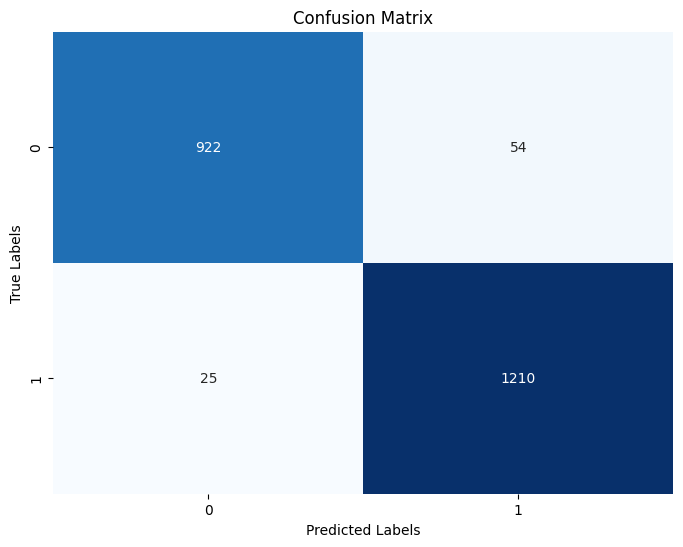

In [67]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test,  y_test_svc), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [58]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

# Random Forest Classifier

In [25]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model 
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [88]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)


In [89]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [90]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [92]:
from sklearn import metrics

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.967

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.994
Random Forest : Recall on test Data: 0.973

Random Forest : precision on training Data: 0.988
Random Forest : precision on test Data: 0.967


In [93]:
#computing the classification report of the model
print("Random Forest Classification Report:")
print(metrics.classification_report(y_test, y_test_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



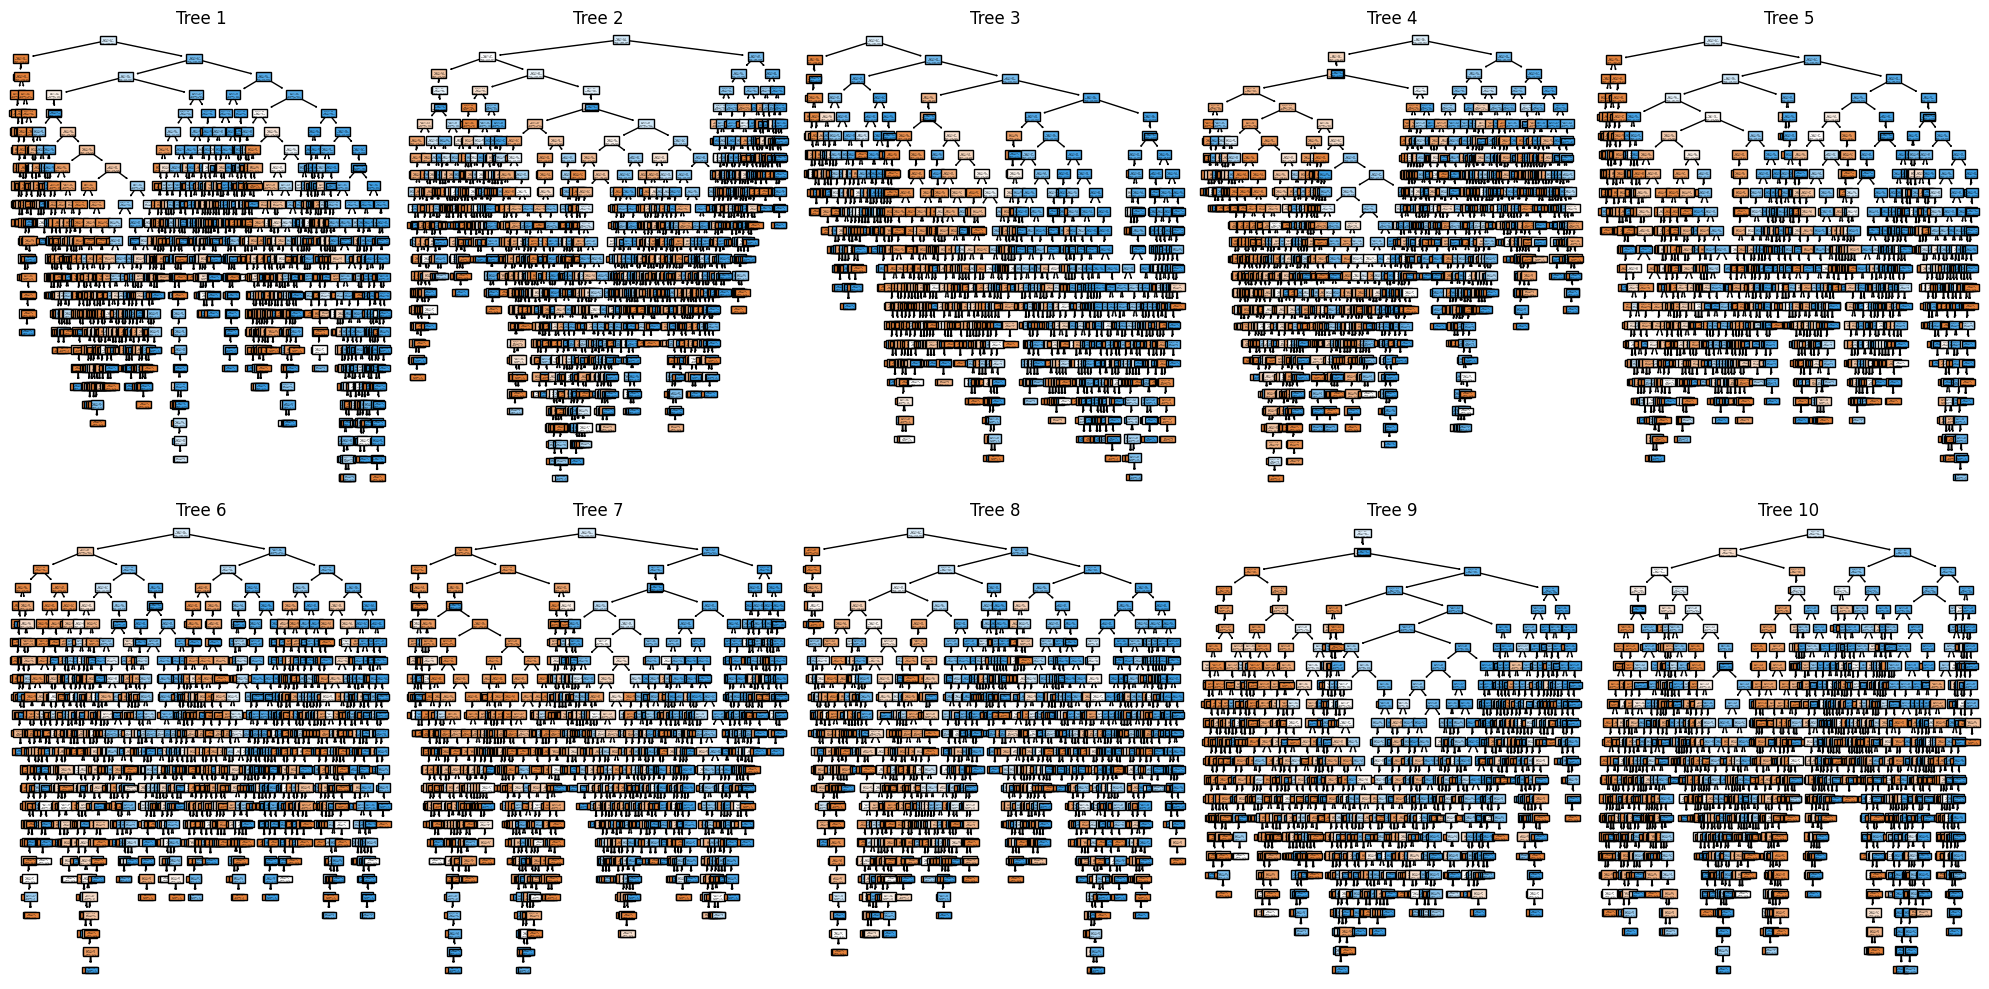

In [38]:
plt.figure(figsize=(20,10))
for i, tree in enumerate(rf_classifier.estimators_[:10]):  # Plot a maximum of 10 trees
    plt.subplot(2, 5, i + 1)
    plot_tree(tree, filled=True, class_names=['No Phishing', 'Phishing'])
    plt.title(f'Tree {i+1}')
plt.tight_layout()
plt.show()

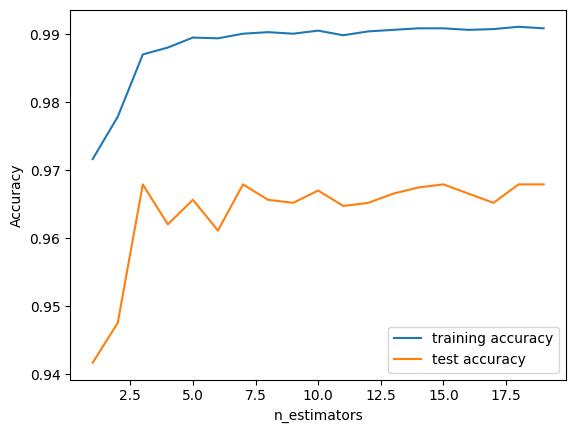

In [94]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [95]:
# Generate a classification report
print("Random Forest Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [96]:
# Generate a confusion matrix
print("Random Forest Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Random Forest Confusion Matrix:
[[ 937   39]
 [  29 1206]]


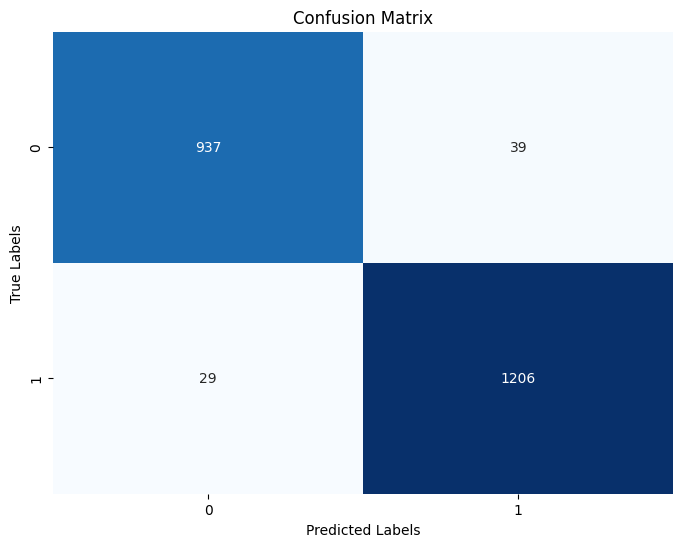

In [97]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [98]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest', acc_test_forest, f1_score_test_forest, recall_score_train_forest, precision_score_train_forest)


# Naive Bayes Classifier

In [99]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [100]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [101]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [102]:
#computing the classification report of the model
print("Naive Bayes Classification Report")
print(metrics.classification_report(y_test, y_test_nb))

Naive Bayes Classification Report
              precision    recall  f1-score   support

          -1       0.53      1.00      0.69       976
           1       0.99      0.29      0.45      1235

    accuracy                           0.60      2211
   macro avg       0.76      0.65      0.57      2211
weighted avg       0.79      0.60      0.56      2211



In [103]:
# Generate a confusion matrix
print("Naive Bayes Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_test_nb))

Naive Bayes Confusion Matrix:
[[974   2]
 [872 363]]


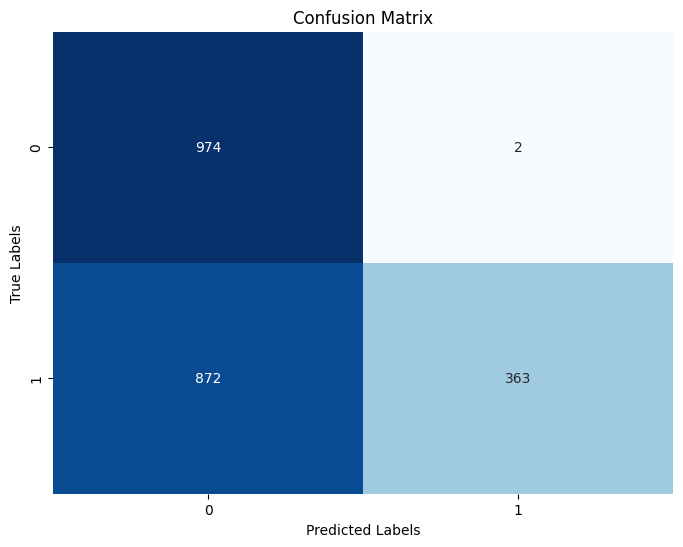

In [104]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_test_nb), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Performance Comparison

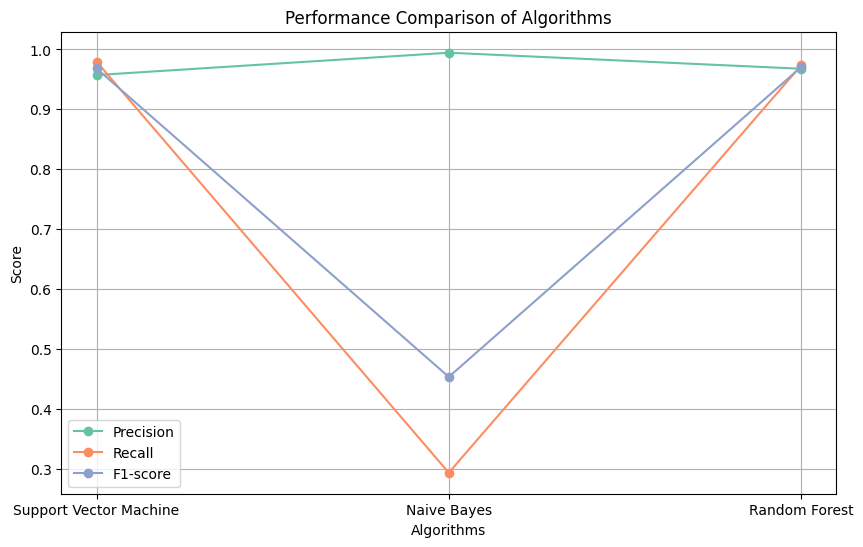

In [109]:
from sklearn.metrics import precision_recall_fscore_support

# Define a mapping between abbreviated names and full names
algorithm_names = {
    "SVC": "Support Vector Machine",
    "NB": "Naive Bayes",
    "Forest": "Random Forest"
}

# Calculate precision, recall, and F1-score for each algorithm
metrics = {}
algorithms = ["SVC", "NB", "Forest"]

for alg_name in algorithms:
    if alg_name == "Random Forest":
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    else:
        y_pred_alg = locals()[f"y_test_{alg_name.lower()}"]
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_alg, average='binary')
    metrics[alg_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1_score}

# Define pastel colors
pastel_colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Plotting the comparison
plt.figure(figsize=(10, 6))

for i, metric in enumerate(['Precision', 'Recall', 'F1-score']):
    plt.plot(
        [algorithm_names[alg] for alg in algorithms],
        [metrics[alg][metric] for alg in algorithms],
        marker='o',
        label=metric,
        color=pastel_colors[i % len(pastel_colors)]
    )

plt.title('Performance Comparison of Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


# Stacked Classifier Building and Training

In [112]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

estimator_list = [
    ('svc',svc),
    ('rf_classifier',rf_classifier),
    ('nb',nb) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = metrics.accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = metrics.matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = metrics.f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = metrics.accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = metrics.matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = metrics.f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.9901617098269818
- MCC: 0.9800654469421632
- F1 score: 0.9901602907074655
----------------------------------
Model performance for Test set
- Accuracy: 0.9701492537313433
- MCC: 0.9394467811815859
- F1 score: 0.9701290931884518


Result:

In [113]:
svc_train_mcc = metrics.matthews_corrcoef(y_train, y_train_svc) # Calculate MCC
svc_model_test_mcc = metrics.matthews_corrcoef(y_test, y_test_svc) # Calculate MCC

rf_train_mcc = metrics.matthews_corrcoef(y_train, y_train_forest) # Calculate MCC
rf_model_test_mcc = metrics.matthews_corrcoef(y_test, y_test_forest) # Calculate MCC

nb_train_mcc = metrics.matthews_corrcoef(y_train, y_train_nb) # Calculate MCC
nb_model_test_mcc = metrics.matthews_corrcoef(y_test, y_test_nb) # Calculate MCC

In [114]:
acc_train_list = {
'svc': acc_train_svc,
'rf_classifier': acc_train_forest,
'nb': acc_train_nb,
'stack': stack_model_train_accuracy}

mcc_train_list = {
'svc': svc_train_mcc,
'rf_classifier': rf_train_mcc,
'nb': nb_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {
'svc': f1_score_train_svc,
'rf_classifier': f1_score_train_forest,
'nb': f1_score_train_nb,
'stack': stack_model_train_f1}

In [115]:
mcc_train_list

{'svc': 0.9379398356475989,
 'rf_classifier': 0.980074683216466,
 'nb': 0.39072675759569986,
 'stack': 0.9800654469421632}

In [116]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
svc,0.969354,0.937940,0.972690
rf_classifier,0.990162,0.980075,0.991188
nb,0.605224,0.390727,0.451359
stack,0.990162,0.980065,0.990160


# Storing Model

In [117]:
import pickle

# dump information to that file
pickle.dump(stack_model, open('pickle/model.pkl', 'wb'))